In [1]:
%matplotlib inline

In [7]:
! pwd
! whoami

/home/reflex/refleX/notebooks
reflex


In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
IMAGE_DIRECTORY = '../metadata/train/'
CENTER_FILE = '../metadata/centers.csv'
POLAR_DIRECTORY = '../metadata/polar512/'
os.listdir(IMAGE_DIRECTORY)

['mcr7-1_1_001.png',
 '102581_1_E2_001.png',
 '57133_1_E1_001.png',
 '17c10p4_2_E1_001.png',
 'A6_1_1.png',
 '100346_M1_B8_high.0001.png',
 '298_M1_H4_peak.0001.png',
 '107516_1_E2_001.png',
 '75004_1_E1_001.png',
 '36121_1_E2_001.png',
 'idp1254t.png',
 '6057_2_001.png',
 '148814_2_0001.png',
 '56355_1_001.png',
 '169248_2_0001.png',
 '138499_2_0001.png',
 '148367_2_0001.png',
 '222975b2_x0001.png',
 '165065_1_E2_0001.png',
 '152245_1_E1_0001.png',
 '62506_2_001.png',
 '028010_MP185_F6_3_A_1_0001.png',
 '92036_1_E2_001.png',
 '180723_1_00001.png',
 'idp1659-3_B.png',
 '170434_1_E2_001.png',
 '75526_1_001.png',
 'u1_t3.0001.png',
 '12217_1_E1_001.png',
 '257345h12_z0001.png',
 'b3zn-far2-2.0001.png',
 '15758_2_001.png',
 '15453_1_001.png',
 '125998_1_E2_001.png',
 '119761_1_E2_001.png',
 '159769_3_0001.png',
 'idp1131_N1_A.png',
 '179492_2_00001.png',
 '100666_2_001.png',
 'por2-10.png',
 'izz8-4.png',
 '12217_2_001.png',
 '31090_2.png',
 '96384_1_E1.png',
 '12c21p2_1_001.png',
 'bvu3-

### Transformacja obrazów do współrzędnych polarnych

https://docs.opencv.org/3.4.3/da/d54/group__imgproc__transform.html

enum  	cv::InterpolationFlags { 
  cv::INTER_NEAREST = 0, 
  cv::INTER_LINEAR = 1, 
  cv::INTER_CUBIC = 2, 
  cv::INTER_AREA = 3, 
  cv::INTER_LANCZOS4 = 4, 
  cv::INTER_LINEAR_EXACT = 5, 
  cv::INTER_MAX = 7, 
  cv::WARP_FILL_OUTLIERS = 8, 
  cv::WARP_INVERSE_MAP = 16 
}
 	interpolation algorithm More...
 
enum  	cv::InterpolationMasks { 
  cv::INTER_BITS = 5, 
  cv::INTER_BITS2 = INTER_BITS * 2, 
  cv::INTER_TAB_SIZE = 1 << INTER_BITS, 
  cv::INTER_TAB_SIZE2 = INTER_TAB_SIZE * INTER_TAB_SIZE 
}

In [ ]:
def img2polar(img, center, method='min'):
    
    def _minimal():
        return min(min(center[0], img.shape[0]-center[0]), min(center[1], img.shape[1]-center[1]))
    def _maximal():
        return np.sqrt(
            min(center[0], img.shape[0]-center[0])**2
            + min(center[1], img.shape[1]-center[1])**2
        )
    
    max_radius = _minimal() if method == 'min' else _maximal()
    polar_image = cv2.linearPolar(img, center, max_radius, cv2.WARP_POLAR_LOG)#TODO
    return polar_image.astype(np.uint8)

In [63]:
center_df = pd.read_csv(CENTER_FILE, index_col=0, header=None) # column order is x, y, (0,0) is NW
print(sorted(os.listdir(IMAGE_DIRECTORY))[:5])
center_df.sort_index().iloc[:5, :]

['000001d8_x0001.png', '011884_KH.4.5_1_0001.png', '012132_NY32-6_1_0001.png', '014307_NY2_1_1_0001.png', '014307_P9_9_1_0001.png']


,1,2
0,,
000001d8_x0001.png,256,256
011884_KH.4.5_1_0001.png,254,259
012132_NY32-6_1_0001.png,253,267
013209_A8_3_3_0001.png,254,262
013574_P6_9_1_0001.png,252,266


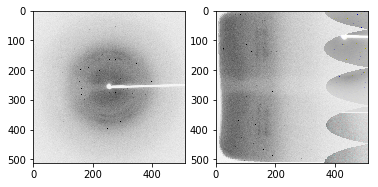

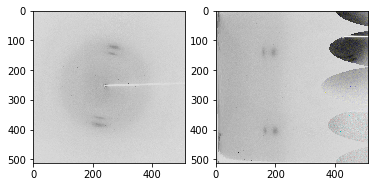

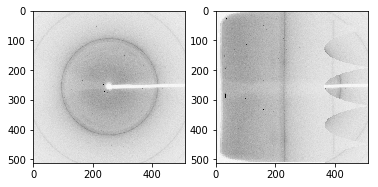

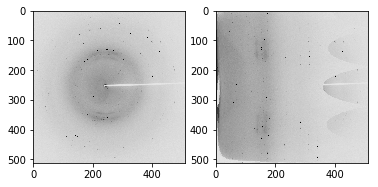

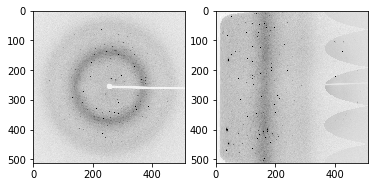

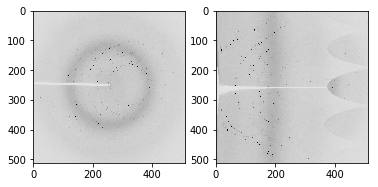

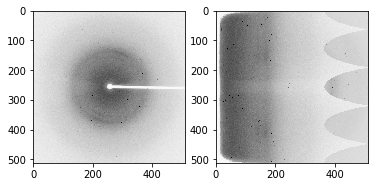

KeyboardInterrupt: 

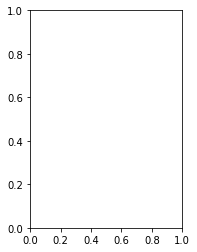

In [113]:
for img_filename in os.listdir(IMAGE_DIRECTORY):
    if img_filename in center_df.index[:200]: #TODO remove
        center = (center_df.loc[img_filename].loc[2], center_df.loc[img_filename].loc[1]) # y,x
        original = cv2.imread(f'{IMAGE_DIRECTORY}{img_filename}', 1)
        polar = img2polar(original, center, method='max')
        _, ax = plt.subplots(1, 2)
        ax[1].imshow(polar)
        ax[0].imshow(original)
        plt.show()
        #cv2.imwrite(POLAR_DIRECTORY+img_filename, polar) TODO UNOCMMENT

In [ ]:
def get_center(img):
    flipped = img.copy()
    cv2.flip(flipped, -1)
    #https://docs.opencv.org/3.4/df/dfb/group__imgproc__object.html#ga3a7850640f1fe1f58fe91a2d7583695d
    ans = cv2.matchTemplate(img, flipped, cv2.TM_CCORR_NORMED)
    print(ans) # TODO ans will be 1x1 if dims of img and template are same
    plt.show()
    return cv2.minMaxLoc(ans)

_fn = os.listdir(IMAGE_DIRECTORY)[0]
_img = cv2.imread(IMAGE_DIRECTORY+_fn, 1)
print(get_center(_img))